In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [33]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [34]:
len(X_train)

60000

In [35]:
len(X_test)

10000

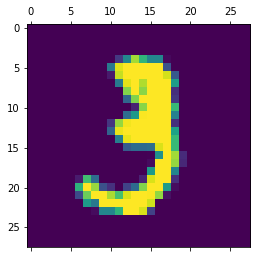

In [36]:
plt.matshow(X_train[10])

In [37]:
X_train = X_train / 255
X_test = X_test / 255

In [38]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape

(60000, 784)

In [39]:
# create model and train
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 781us/step - loss: 0.6988 - accuracy: 0.8227
Epoch 2/5
1875/1875 [==============================] - 1s 750us/step - loss: 0.3024 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 1s 745us/step - loss: 0.2851 - accuracy: 0.9216
Epoch 4/5
1875/1875 [==============================] - 1s 735us/step - loss: 0.2685 - accuracy: 0.9246
Epoch 5/5
1875/1875 [==============================] - 1s 754us/step - loss: 0.2597 - accuracy: 0.9276


In [40]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 660us/step - loss: 0.2685 - accuracy: 0.9259


[0.26847562193870544, 0.9258999824523926]

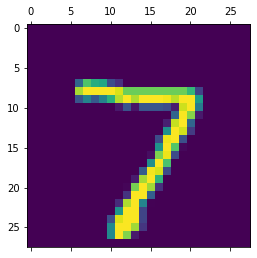

In [41]:
# just want to check a value for myself
plt.matshow(X_test[0])

In [42]:
y_predicted = model.predict(X_test_flattened)

In [43]:
y_predicted[0]

array([2.5386631e-02, 2.9709642e-07, 7.8606158e-02, 9.5971727e-01,
       2.3969114e-03, 1.2370780e-01, 1.0985018e-06, 9.9982530e-01,
       1.4572591e-01, 7.3854339e-01], dtype=float32)

In [44]:
np.argmax(y_predicted[0])

7

In [45]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [46]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [47]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    2,    2,    0,    5,    4,    2,    3,    0],
       [   0, 1100,    5,    2,    0,    1,    4,    2,   21,    0],
       [   4,    7,  928,   16,    7,    3,   12,   10,   41,    4],
       [   4,    0,   20,  913,    0,   26,    2,   10,   26,    9],
       [   1,    1,    8,    1,  904,    0,    7,    4,   10,   46],
       [   8,    2,    5,   26,    6,  780,   10,    7,   40,    8],
       [   9,    3,    8,    1,    7,   16,  907,    2,    5,    0],
       [   1,    5,   25,    6,    7,    1,    0,  943,    3,   37],
       [   5,    2,    7,   17,    9,   22,    7,   10,  888,    7],
       [  10,    5,    1,    8,   16,    7,    0,   16,   12,  934]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

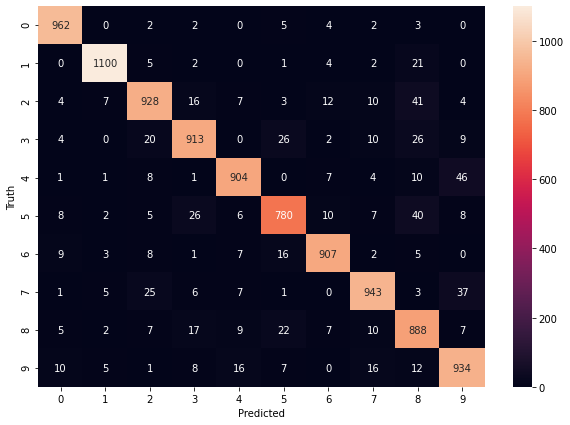

In [48]:
# plot number of correct and incorrect predictions
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [50]:
# adding a hidden layer
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 976us/step - loss: 0.4688 - accuracy: 0.8674
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1345 - accuracy: 0.9610
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0900 - accuracy: 0.9732
Epoch 4/5
1875/1875 [==============================] - 2s 953us/step - loss: 0.0653 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 2s 951us/step - loss: 0.0511 - accuracy: 0.9841


In [51]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 843us/step - loss: 0.0783 - accuracy: 0.9771


[0.07825867831707001, 0.9771000146865845]

Text(69.0, 0.5, 'Truth')

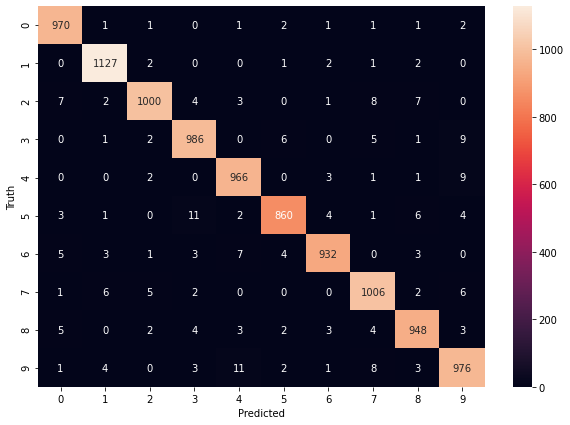

In [53]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')